<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Classification with Python</font></h1>


In this notebook we try to practice all the classification algorithms that we have learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Let's first load required libraries:


<div class="alert alert-info" style="border-color: #0080FF; border-radius: 5px">
    <p><u><b>Student's comment</b></u></p>
    
  My level of English does not allow me to understand everything at once, but I am trying to use a translator, but I am not sure that it gives the correct translation. In this course I have encountered the following problems:  
1. Inability to register an account in IBM Cloud  
2. Lack of Coursera support  
3.Outdated modules in Student's comment, incorrect data for data loading  
      
I made this project based on how I understood it: to find the best classifier by quality metrics. I did the following: in   cycles, I selected the optimal parameters of the Decision Tree and CNN, and then wrote a function that outputs quality metrics.   Next, I tested these best models on a loaded test sample and also checked through the function and got quality metrics.  

In [51]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [52]:
#notice: Disable all warnings 
import warnings
warnings.filterwarnings('ignore')

### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


Let's download the dataset


In [53]:
#!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

### Load Data From CSV File


In [54]:
df = pd.read_csv(r'C:\Users\yaks6\Desktop\Новая папка\loan_train.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [55]:
df.shape

(346, 10)

### Convert to date time object


In [56]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing


Let’s see how many of each class is in our data set


In [57]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection


Let's plot some columns to underestand data better:


In [58]:
# notice: installing seaborn might takes a few minutes
!pip install seaborn

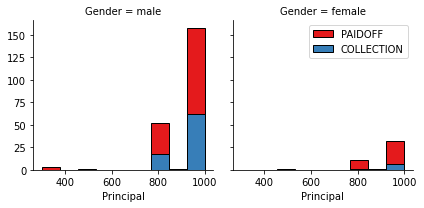

In [59]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

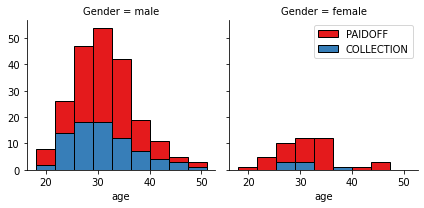

In [60]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction


### Let's look at the day of the week people get the loan


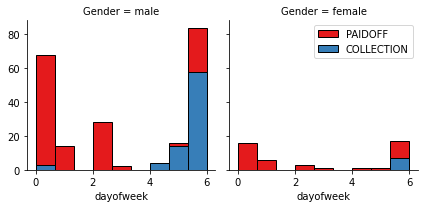

In [61]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week don't pay it off, so let's use Feature binarization to set a threshold value less than day 4


In [62]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.tail()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
341,394,394,COLLECTION,800,15,2016-09-11,2016-09-25,32,High School or Below,male,6,1
342,395,395,COLLECTION,1000,30,2016-09-11,2016-10-10,25,High School or Below,male,6,1
343,397,397,COLLECTION,800,15,2016-09-12,2016-09-26,39,college,male,0,0
344,398,398,COLLECTION,1000,30,2016-09-12,2016-11-10,28,college,male,0,0
345,399,399,COLLECTION,1000,30,2016-09-12,2016-10-11,26,college,male,0,0


## Convert Categorical features to numerical values


Let's look at gender:


In [63]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Let's convert male to 0 and female to 1:


In [64]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


In [65]:
df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,0,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,0,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,0,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,0,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,0,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding

#### How about education?


In [66]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              0              0.750000
                      1              0.250000
High School or Below  0              0.741722
                      1              0.258278
Master or Above       0              0.500000
                      1              0.500000
college               0              0.765101
                      1              0.234899
Name: loan_status, dtype: float64

#### Features before One Hot Encoding


In [67]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame


In [68]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature Selection


Let's define feature sets, X:


In [69]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?


In [70]:
Y = df['loan_status'].values
Y[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

## Normalize Data


Data Standardization give data zero mean and unit variance (technically should be done after train test split)


In [71]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification


Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression

\__ Notice:\__

*   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
*   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
*   You should include the code of the algorithm in the following cells.


In [72]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
features_train,features_test, target_train, target_test = train_test_split(X,Y,test_size=0.2,random_state=12345)
print ('Train set:', features_train.shape,  target_train.shape)
print ('Test set:', features_test.shape, target_test.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


# K Nearest Neighbor(KNN)

Notice: You should find the best k to build the model with the best accuracy.\
**warning:** You should not use the **loan_test.csv** for finding the best k, however, you can split your train_loan.csv into train and test to find the best **k**.


In [75]:
from sklearn.neighbors import KNeighborsClassifier

best_k = 0
best_modelKNN = None
best_accuracy_test = 0

for k in range (1,11):
    modelKNN = KNeighborsClassifier(n_neighbors = k).fit(features_train,target_train)
    predictionsKNN_train = modelKNN.predict(features_train)
    predictionsKNN_test = modelKNN.predict(features_test)
    accuracyKNN_train= accuracy_score(target_train, predictionsKNN_train)
    accuracyKNN_test= accuracy_score(target_test, predictionsKNN_test)
    
    print(f'k={k},accuracy train: {accuracyKNN_train}, accuracy test: {accuracyKNN_test}')
    
    if accuracyKNN_test > best_accuracy_test:
        best_accuracy_test = accuracyKNN_test
        best_accuracy_train = accuracyKNN_train
        best_modelKNN = modelKNN
        best_k = k
print(' ')
print(f'The best k={best_k}, best accuracy_test:{best_accuracy_test} and accuracy_train:{best_accuracy_train} and the best model:{best_modelKNN}')


k=1,accuracy train: 0.894927536231884, accuracy test: 0.6285714285714286
k=2,accuracy train: 0.8369565217391305, accuracy test: 0.7142857142857143
k=3,accuracy train: 0.8478260869565217, accuracy test: 0.6857142857142857
k=4,accuracy train: 0.8260869565217391, accuracy test: 0.6857142857142857
k=5,accuracy train: 0.8442028985507246, accuracy test: 0.6571428571428571
k=6,accuracy train: 0.8152173913043478, accuracy test: 0.7428571428571429
k=7,accuracy train: 0.8152173913043478, accuracy test: 0.6857142857142857
k=8,accuracy train: 0.8188405797101449, accuracy test: 0.7
k=9,accuracy train: 0.8007246376811594, accuracy test: 0.6857142857142857
k=10,accuracy train: 0.782608695652174, accuracy test: 0.7428571428571429
 
The best k=6, best accuracy_test:0.7428571428571429 and accuracy_train:0.8152173913043478 and the best model:KNeighborsClassifier(n_neighbors=6)


# Decision Tree


In [76]:
from sklearn.tree import DecisionTreeClassifier

In [102]:
best_depth = 0
best_modelDTC = None
best_accuracy_test = 0

for depth in range (1,21):
    modelDTC = DecisionTreeClassifier(max_depth = depth, random_state=12345).fit(features_train,target_train)
    predictionsDTC_train = pd.Series(modelDTC.predict(features_train))
    predictionsDTC_test = pd.Series(modelDTC.predict(features_test))
    accuracyDTC_train= accuracy_score(target_train, predictionsDTC_train)
    accuracyDTC_test= accuracy_score(target_test, predictionsDTC_test)
    print(f'depth={depth},accuracy train: {accuracyDTC_train}, accuracy test: {accuracyDTC_test}')
    
    if accuracyDTC_test > best_accuracy_test:
        best_accuracy_test = accuracyDTC_test
        best_accuracy_train = accuracyDTC_train
        best_modelDTC = modelDTC
        best_depth = depth
print(' ')
print(f'The best depth={best_depth}, best accuracy_test:{best_accuracy_test} and accuracy_train:{best_accuracy_train} and the best model:{best_modelDTC}')


depth=1,accuracy train: 0.7463768115942029, accuracy test: 0.7714285714285715
depth=2,accuracy train: 0.7463768115942029, accuracy test: 0.7714285714285715
depth=3,accuracy train: 0.75, accuracy test: 0.6857142857142857
depth=4,accuracy train: 0.782608695652174, accuracy test: 0.7
depth=5,accuracy train: 0.7971014492753623, accuracy test: 0.6857142857142857
depth=6,accuracy train: 0.8260869565217391, accuracy test: 0.6285714285714286
depth=7,accuracy train: 0.8333333333333334, accuracy test: 0.6428571428571429
depth=8,accuracy train: 0.8478260869565217, accuracy test: 0.6285714285714286
depth=9,accuracy train: 0.8695652173913043, accuracy test: 0.7
depth=10,accuracy train: 0.8840579710144928, accuracy test: 0.6
depth=11,accuracy train: 0.8913043478260869, accuracy test: 0.6285714285714286
depth=12,accuracy train: 0.9057971014492754, accuracy test: 0.6285714285714286
depth=13,accuracy train: 0.9094202898550725, accuracy test: 0.6285714285714286
depth=14,accuracy train: 0.909420289855072

# Support Vector Machine


In [103]:
from sklearn import svm
modelSVM = svm.SVC(kernel='rbf',random_state=12345)

# Logistic Regression


In [104]:
from sklearn.linear_model import LogisticRegression

In [105]:
modelLR = LogisticRegression(C=0.01, solver='liblinear',random_state=12345)

# Model Evaluation using Test set


In [106]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss


In [107]:
def models_learn(model):
    model.fit(features_train,target_train)
    prediction = pd.Series(model.predict(features_test))
    accuracy = accuracy_score(target_test, prediction)
    F1 = f1_score(target_test, prediction)
    JS = jaccard_score(target_test, prediction)
    LL=log_loss(target_test, prediction, eps=1e-15, normalize=True, sample_weight=None, labels=None)
    print(f'Model:{model}, F1:{F1}, accuracy:{accuracy}, jaccard score:{JS}, log_loss:{LL}')
    
models_learn(best_modelKNN)
models_learn(best_modelDTC)
models_learn(modelSVM)
models_learn(modelLR)

Model:KNeighborsClassifier(n_neighbors=6), F1:0.25, accuracy:0.7428571428571429, jaccard score:0.14285714285714285, log_loss:8.881456758507762
Model:DecisionTreeClassifier(max_depth=1, random_state=12345), F1:0.0, accuracy:0.7714285714285715, jaccard score:0.0, log_loss:7.894577461693871
Model:SVC(random_state=12345), F1:0.17391304347826086, accuracy:0.7285714285714285, jaccard score:0.09523809523809523, log_loss:9.374867849863628
Model:LogisticRegression(C=0.01, random_state=12345, solver='liblinear'), F1:0.08695652173913043, accuracy:0.7, jaccard score:0.045454545454545456, log_loss:10.361701455395794


First, download and load the test set:


In [108]:
#!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

### Load Test set for evaluation


In [109]:
test_df = pd.read_csv(r'C:\Users\yaks6\Desktop\Новая папка\loan_test.csv')
test_df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [110]:
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,male
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,male


In [111]:
test_df['loan_status'].value_counts()

PAIDOFF       40
COLLECTION    14
Name: loan_status, dtype: int64

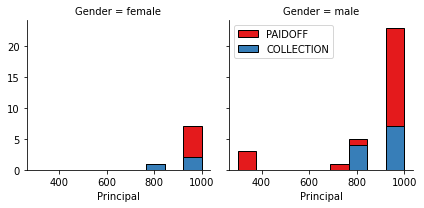

In [112]:
import seaborn as sns

bins = np.linspace(test_df.Principal.min(), test_df.Principal.max(), 10)
g = sns.FacetGrid(test_df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

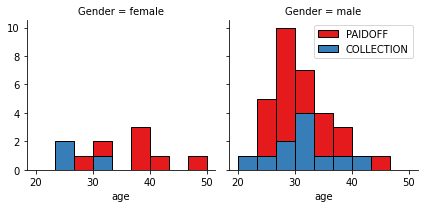

In [113]:
bins = np.linspace(test_df.age.min(), test_df.age.max(), 10)
g = sns.FacetGrid(test_df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

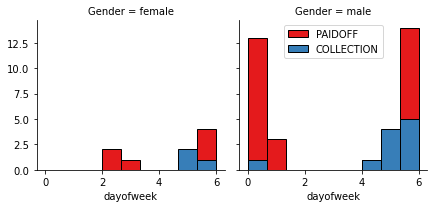

In [114]:
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
bins = np.linspace(test_df.dayofweek.min(), test_df.dayofweek.max(), 10)
g = sns.FacetGrid(test_df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [115]:
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df.tail()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
49,348,348,COLLECTION,1000,30,2016-09-11,2016-10-10,32,High School or Below,male,6,1
50,349,349,COLLECTION,800,15,2016-09-11,2016-09-25,29,college,male,6,1
51,369,369,COLLECTION,1000,30,2016-09-11,2016-10-10,37,High School or Below,male,6,1
52,370,370,COLLECTION,800,15,2016-09-11,2016-09-25,36,High School or Below,male,6,1
53,396,396,COLLECTION,1000,30,2016-09-12,2016-10-11,33,High School or Below,male,0,0


In [116]:
test_df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.727273
        COLLECTION     0.272727
male    PAIDOFF        0.744186
        COLLECTION     0.255814
Name: loan_status, dtype: float64

In [117]:
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
test_df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,1,3,0
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,0,4,1
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,1,5,1
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,0,5,1
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,0,6,1


In [118]:
test_df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[0,1],inplace=True)
test_df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,0,1000,30,2016-09-08,2016-10-07,50,Bechalor,1,3,0
1,5,5,0,300,7,2016-09-09,2016-09-15,35,Master or Above,0,4,1
2,21,21,0,1000,30,2016-09-10,2016-10-09,43,High School or Below,1,5,1
3,24,24,0,1000,30,2016-09-10,2016-10-09,26,college,0,5,1
4,35,35,0,800,15,2016-09-11,2016-09-25,29,Bechalor,0,6,1


In [119]:
test_df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              0              1.000000
High School or Below  0              0.523810
                      1              0.476190
Master or Above       0              1.000000
college               0              0.826087
                      1              0.173913
Name: loan_status, dtype: float64

In [120]:
test_df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,50,1,Bechalor
1,300,7,35,0,Master or Above
2,1000,30,43,1,High School or Below
3,1000,30,26,0,college
4,800,15,29,0,Bechalor


In [121]:
Feature1 = test_df[['Principal','terms','age','Gender','weekend']]
Feature1 = pd.concat([Feature1,pd.get_dummies(test_df['education'])], axis=1)
Feature1.drop(['Master or Above'], axis = 1,inplace=True)
Feature1.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


In [122]:
X1 = Feature1
X1[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


In [123]:
Y1 = test_df['loan_status'].values
Y1[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [124]:
X1= preprocessing.StandardScaler().fit(X1).transform(X1)
X1[0:5]

array([[ 0.49362588,  0.92844966,  3.05981865,  1.97714211, -1.30384048,
         2.39791576, -0.79772404, -0.86135677],
       [-3.56269116, -1.70427745,  0.53336288, -0.50578054,  0.76696499,
        -0.41702883, -0.79772404, -0.86135677],
       [ 0.49362588,  0.92844966,  1.88080596,  1.97714211,  0.76696499,
        -0.41702883,  1.25356634, -0.86135677],
       [ 0.49362588,  0.92844966, -0.98251057, -0.50578054,  0.76696499,
        -0.41702883, -0.79772404,  1.16095912],
       [-0.66532184, -0.78854628, -0.47721942, -0.50578054,  0.76696499,
         2.39791576, -0.79772404, -0.86135677]])

In [125]:
def models_learn1(model):
    
    prediction = pd.Series(model.predict(X1))
    accuracy = accuracy_score(Y1, prediction)
    F1 = f1_score(Y1, prediction)
    JS = jaccard_score(Y1, prediction)
    LL=log_loss(Y1, prediction, eps=1e-15, normalize=True, sample_weight=None, labels=None)
    print(f'Model:{model}, F1:{F1}, accuracy:{accuracy}, jaccard score:{JS}, log_loss:{LL}')
    
models_learn1(best_modelKNN)
models_learn1(best_modelDTC)
models_learn1(modelSVM)
models_learn(modelLR)

Model:KNeighborsClassifier(n_neighbors=6), F1:0.11764705882352941, accuracy:0.7222222222222222, jaccard score:0.0625, log_loss:9.59413416886149
Model:DecisionTreeClassifier(max_depth=1, random_state=12345), F1:0.0, accuracy:0.7407407407407407, jaccard score:0.0, log_loss:8.954497583865733
Model:SVC(random_state=12345), F1:0.10526315789473682, accuracy:0.6851851851851852, jaccard score:0.05555555555555555, log_loss:10.873377724133375
Model:LogisticRegression(C=0.01, random_state=12345, solver='liblinear'), F1:0.08695652173913043, accuracy:0.7, jaccard score:0.045454545454545456, log_loss:10.361701455395794


<div class="alert alert-info" style="border-color: #0080FF; border-radius: 5px">
    <p><u><b>Student's comment</b></u></p>
in my opinion the best classifier - KNeighborsClassifier(n_neighbors=6)

# Report

You should be able to report the accuracy of the built model using different evaluation metrics:


| Algorithm          | Jaccard | F1-score | LogLoss |
| ------------------ | ------- | -------- | ------- |
| KNN                | 0.0625  | 0.117647 | NA      |
| Decision Tree      | 0.00    | 0.00     | NA      |
| SVM                | 0.05555 | 0.10526  | NA      |
| LogisticRegression | 0.04545 | 0.08695  | 10.36170|


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                                                             |
| ----------------- | ------- | ------------- | ------------------------------------------------------------------------------ |
| 2020-10-27        | 2.1     | Lakshmi Holla | Made changes in import statement due to updates in version of  sklearn library |
| 2020-08-27        | 2.0     | Malika Singla | Added lab to GitLab                                                            |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
